In [1]:
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../utils/')
import FigureConfig as FC
from tsmoothie.smoother import LowessSmoother

In [2]:
datasets = os.listdir('./evaluation/')
datasets = [f for f in datasets if f.startswith('result_')]
datasets.sort()
datasets

['result_data:acuteinflammation',
 'result_data:balancescale',
 'result_data:breastcancerwisc',
 'result_data:cardiotocography3clases',
 'result_data:energyy1',
 'result_data:energyy2',
 'result_data:iris',
 'result_data:mammographic',
 'result_data:pendigits',
 'result_data:seeds',
 'result_data:tictactoe',
 'result_data:vertebralcolumn2clases',
 'result_data:vertebralcolumn3clases']

In [3]:
alpha = torch.linspace(0,1,51)

In [4]:
results_manuel = torch.zeros([13,10,51,4])

In [5]:
def flt(data, smoother):
    result = np.zeros([10,51,4])
    for i in range(10):
        smoother.smooth(data[i,:,:].T)
        result[i,:,:] = smoother.smooth_data.T
    return torch.tensor(result)

tensor([0.2596, 0.3031, 0.2805, 0.2940, 0.2820, 0.2820, 0.3031, 0.2820, 0.2775,
        0.2989], dtype=torch.float64)


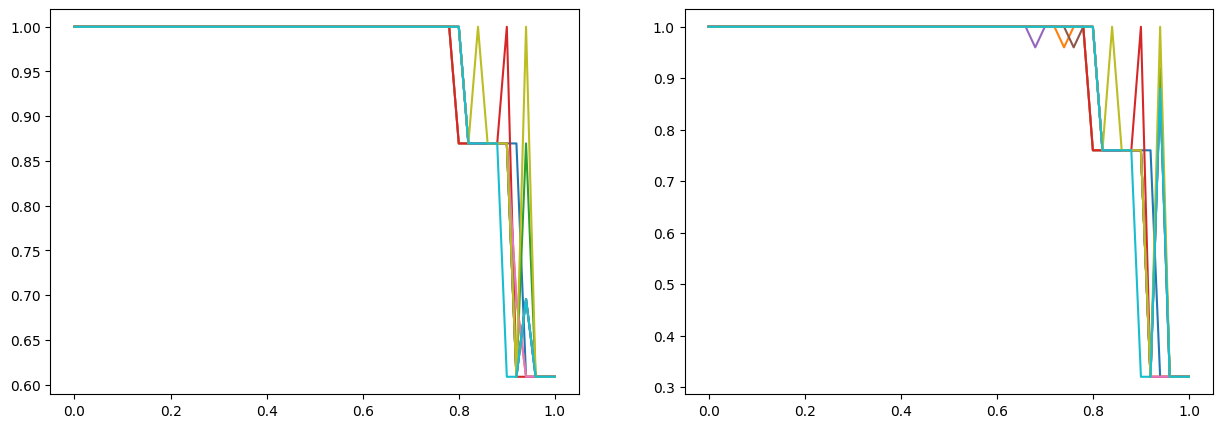

<Figure size 640x480 with 0 Axes>

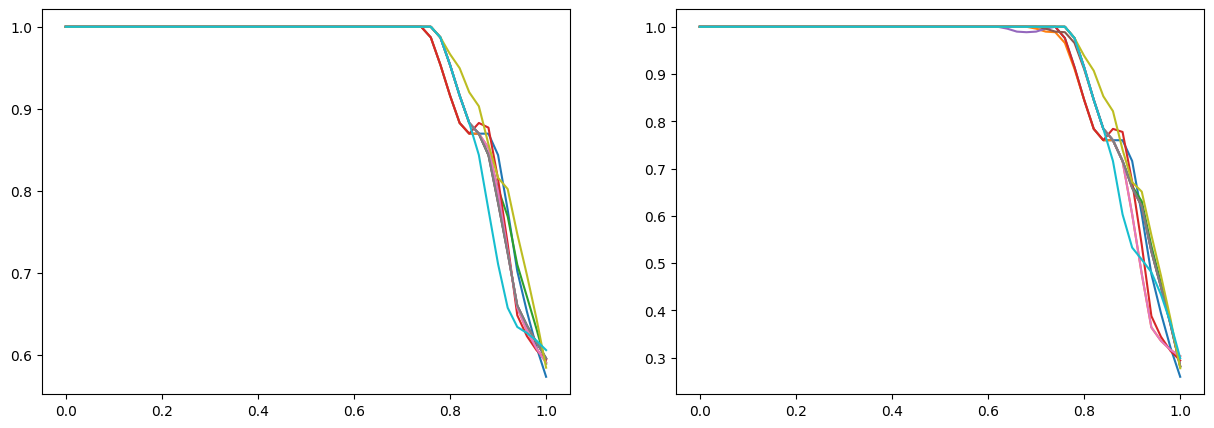

<Figure size 640x480 with 0 Axes>

In [6]:
ds = 0

dataset = datasets[ds]
result = torch.load(f'./evaluation/{dataset}')


smoother = LowessSmoother(smooth_fraction=0.1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,0])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,2])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,0])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,2])

results_manuel[ds,:,:,0] = result_flt[i,:,0]
results_manuel[ds,:,:,2] = result_flt[i,:,2]
print(result_flt[:,-1,2])

tensor([0.3249, 0.3133, 0.3141, 0.2569, 0.3288, 0.3269, 0.3099, 0.3085, 0.3249,
        0.3234], dtype=torch.float64)


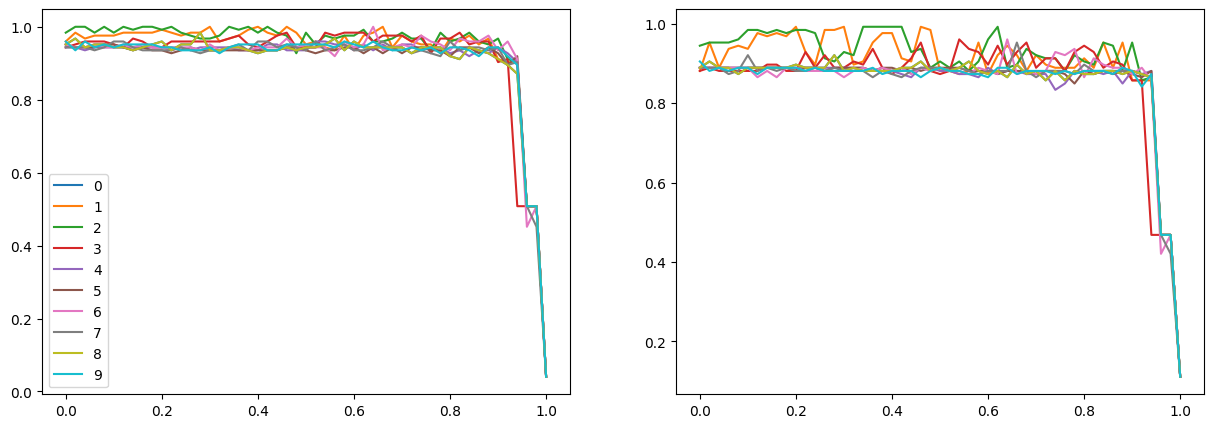

<Figure size 640x480 with 0 Axes>

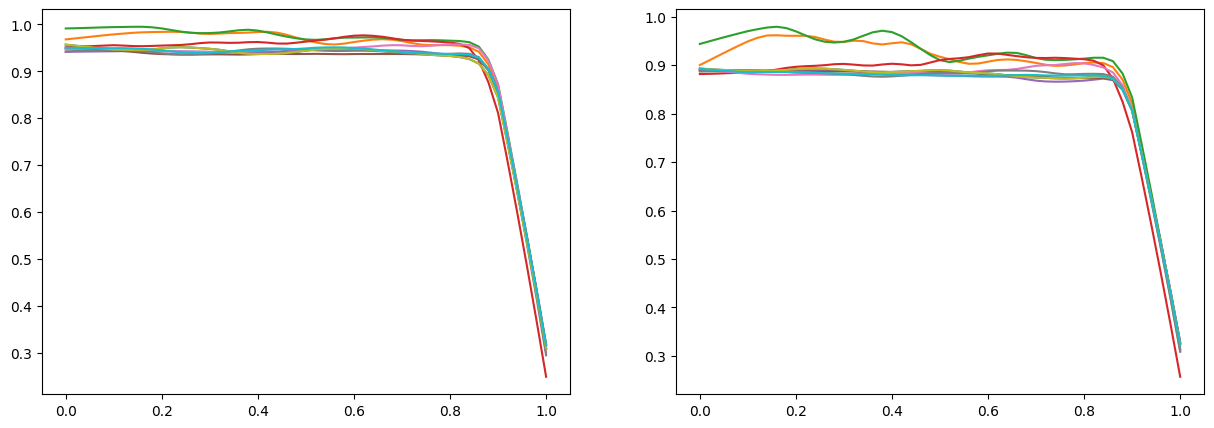

<Figure size 640x480 with 0 Axes>

In [7]:
ds = 1

dataset = datasets[ds]
result = torch.load(f'./evaluation/{dataset}')

result[8,:,:] = result[0,:,:]

smoother = LowessSmoother(smooth_fraction=0.2)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,0], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,2])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,0])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,2])

results_manuel[ds,:,:,0] = result_flt[i,:,0]
results_manuel[ds,:,:,2] = result_flt[i,:,2]
print(result_flt[:,-1,2])

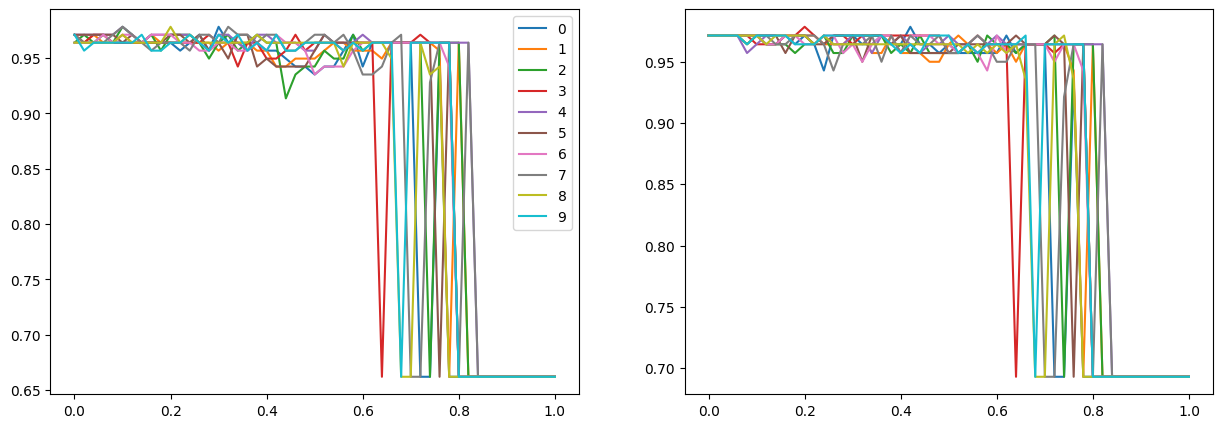

<Figure size 640x480 with 0 Axes>

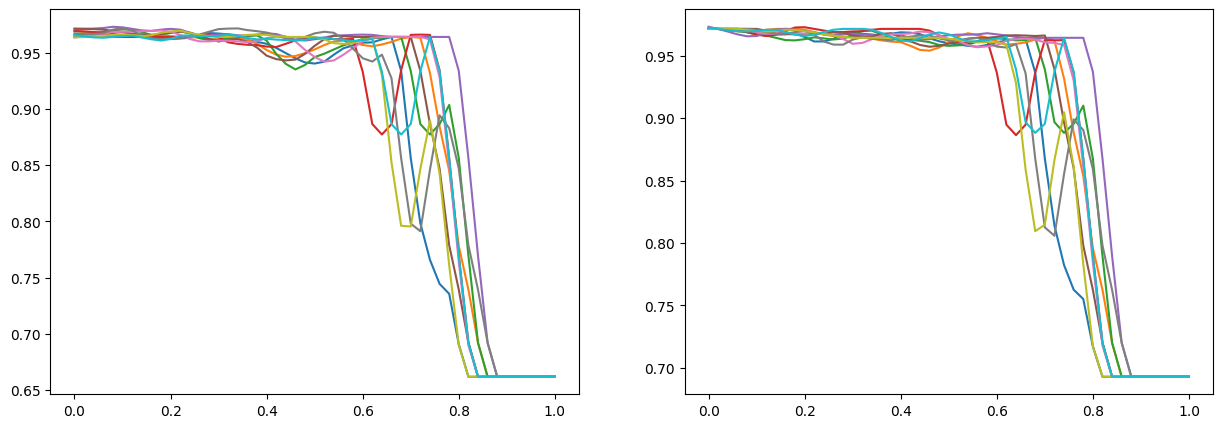

<Figure size 640x480 with 0 Axes>

In [8]:
ds = 2

dataset = datasets[ds]
result = torch.load(f'./evaluation/{dataset}')

# result[8,:,:] = result[0,:,:]

smoother = LowessSmoother(smooth_fraction=0.1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,0], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,2])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,0])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,2])

results_manuel[ds,:,:,0] = result_flt[i,:,0]
results_manuel[ds,:,:,2] = result_flt[i,:,2]

tensor([0.7629, 0.7629, 0.7629, 0.7629, 0.7629, 0.7629, 0.7629, 0.7629, 0.7629,
        0.7629])


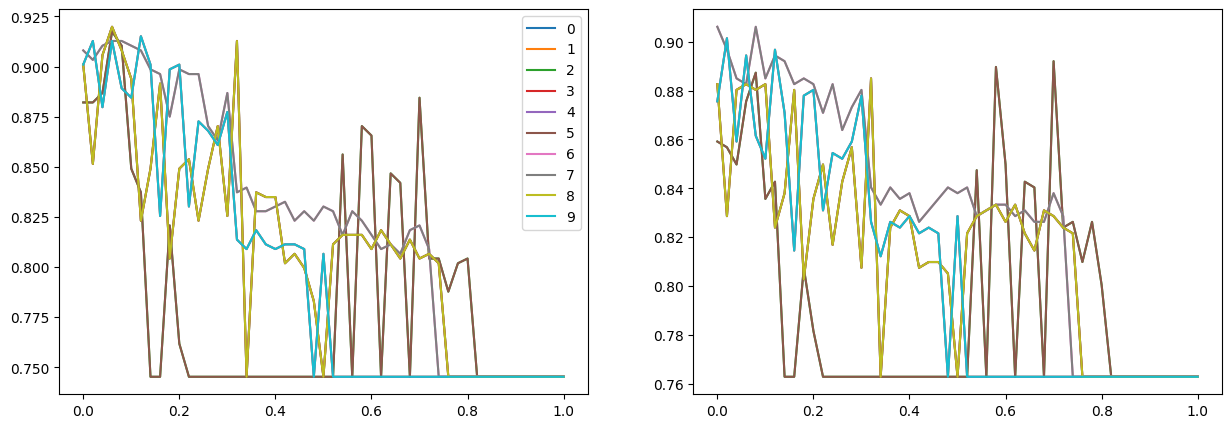

<Figure size 640x480 with 0 Axes>

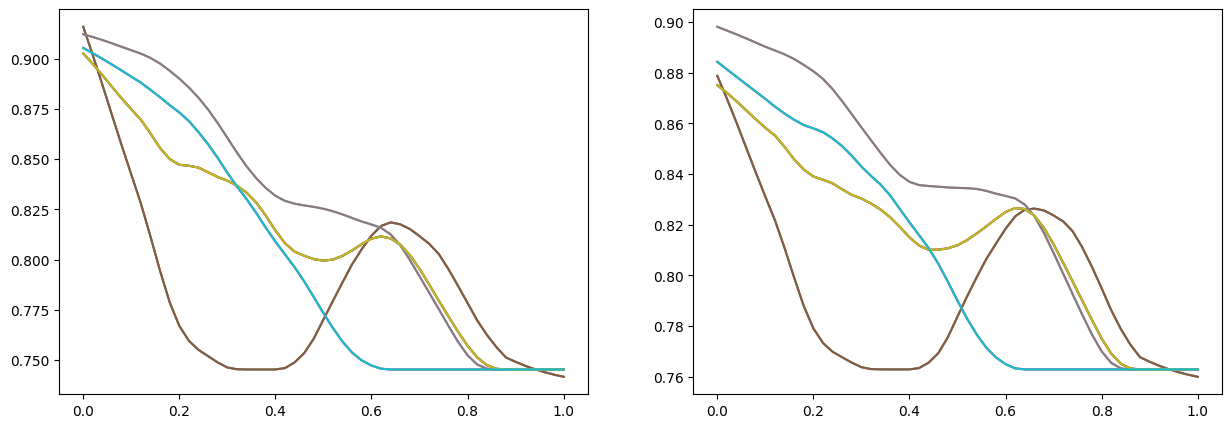

<Figure size 640x480 with 0 Axes>

In [9]:
ds = 3

dataset = datasets[ds]
result = torch.load(f'./evaluation/{dataset}')

result[3,:,:] = result[0,:,:]
result[4,:,:] = result[1,:,:]
result[5,:,:] = result[2,:,:]
result[6,:,:] = result[7,:,:]
result[8,:,:] = result[3,:,:]
result[9,:,:] = result[4,:,:]

smoother = LowessSmoother(smooth_fraction=0.25, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,0], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,2])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,0])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,2])

results_manuel[ds,:,:,0] = result_flt[i,:,0]
results_manuel[ds,:,:,2] = result_flt[i,:,2]
print(result[:,-1,2])

tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000])


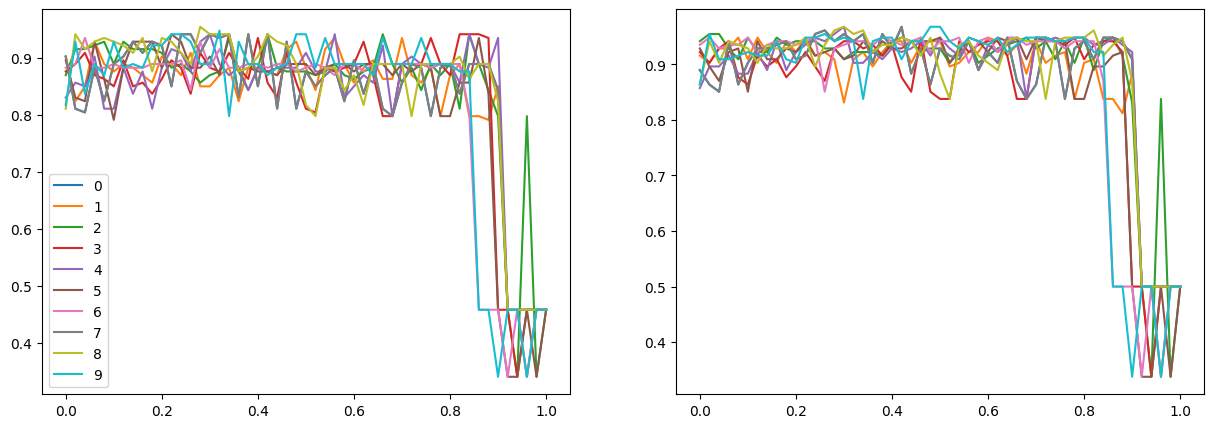

<Figure size 640x480 with 0 Axes>

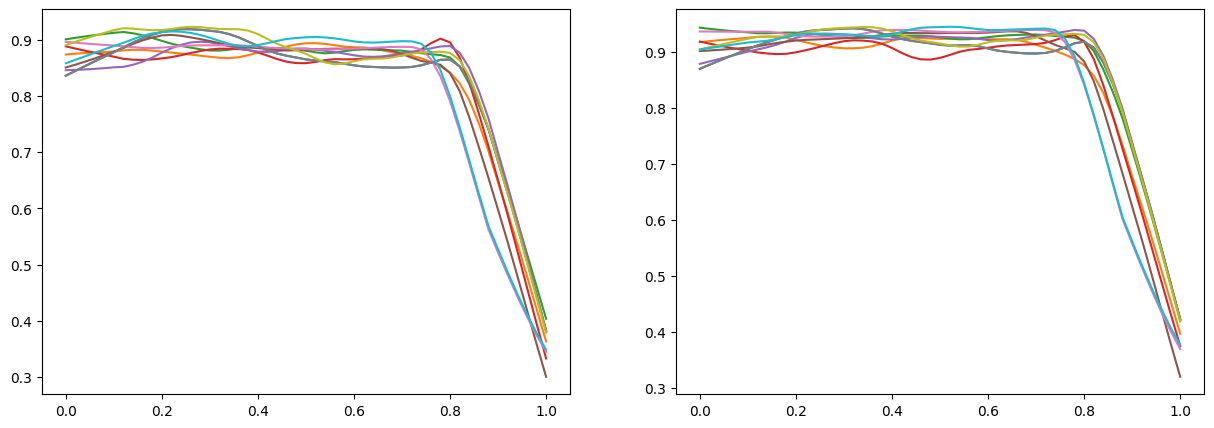

<Figure size 640x480 with 0 Axes>

In [10]:
ds = 4

dataset = datasets[ds]
result = torch.load(f'./evaluation/{dataset}')

result[7,:,:] = result[0,:,:]

smoother = LowessSmoother(smooth_fraction=0.25, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,0], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,2])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,0])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,2])

results_manuel[ds,:,:,0] = result_flt[i,:,0]
results_manuel[ds,:,:,2] = result_flt[i,:,2]
print(result[:,-1,2])

tensor([0.5260, 0.5260, 0.5260, 0.5260, 0.5260, 0.5260, 0.5260, 0.5260, 0.5260,
        0.5260])


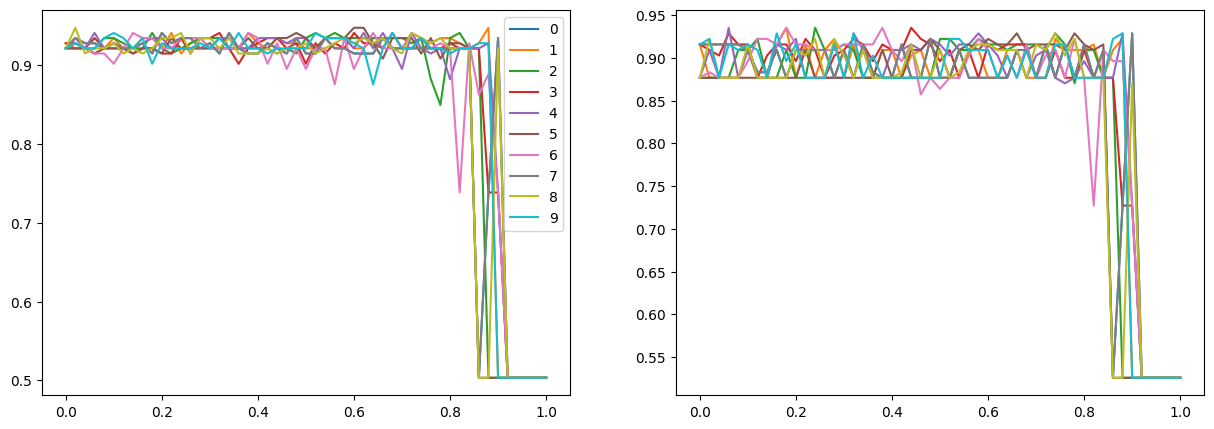

<Figure size 640x480 with 0 Axes>

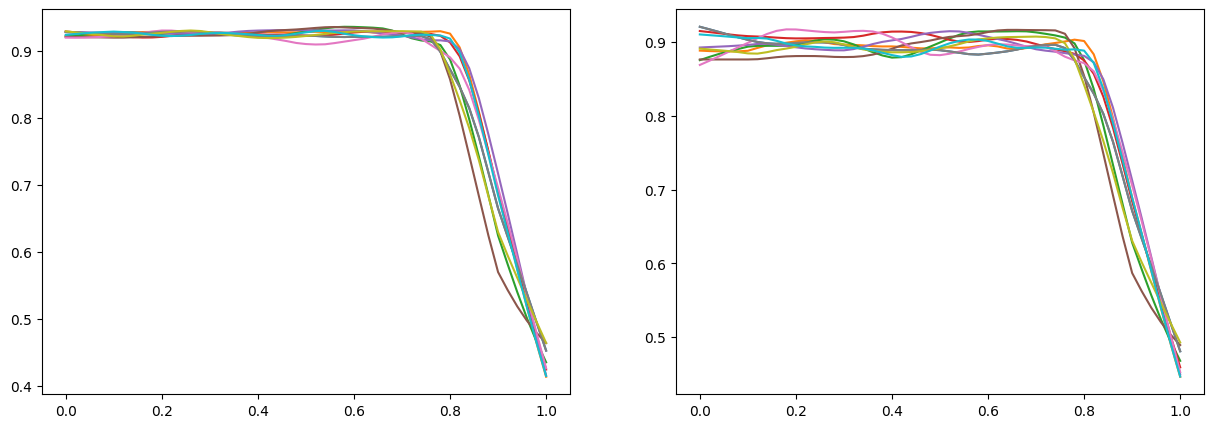

<Figure size 640x480 with 0 Axes>

In [11]:
ds = 5

dataset = datasets[ds]
result = torch.load(f'./evaluation/{dataset}')

result[7,:,:] = result[0,:,:]

smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,0], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,2])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,0])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,2])

results_manuel[ds,:,:,0] = result_flt[i,:,0]
results_manuel[ds,:,:,2] = result_flt[i,:,2]
print(result[:,-1,2])

tensor([0.3226, 0.3226, 0.3226, 0.3226, 0.3226, 0.3226, 0.3226, 0.3226, 0.3226,
        0.3226])


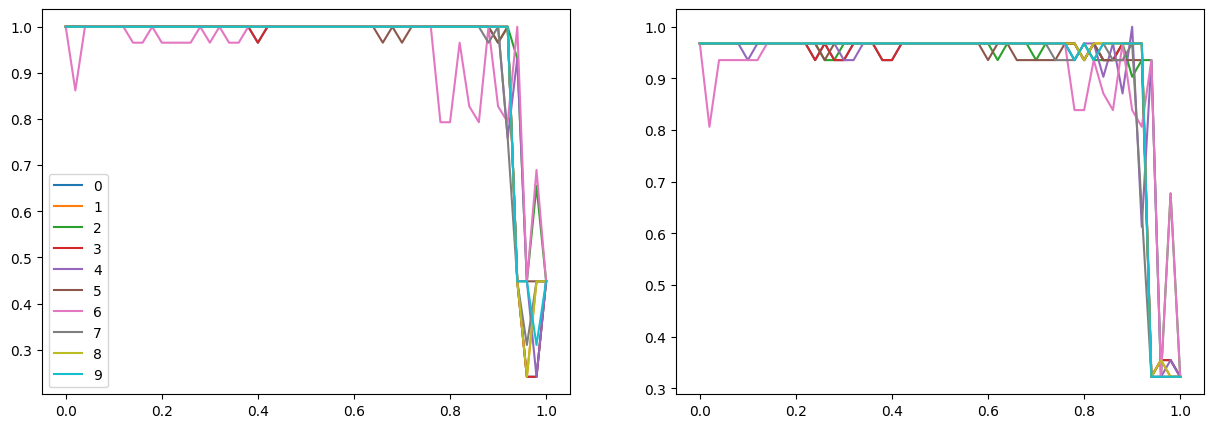

<Figure size 640x480 with 0 Axes>

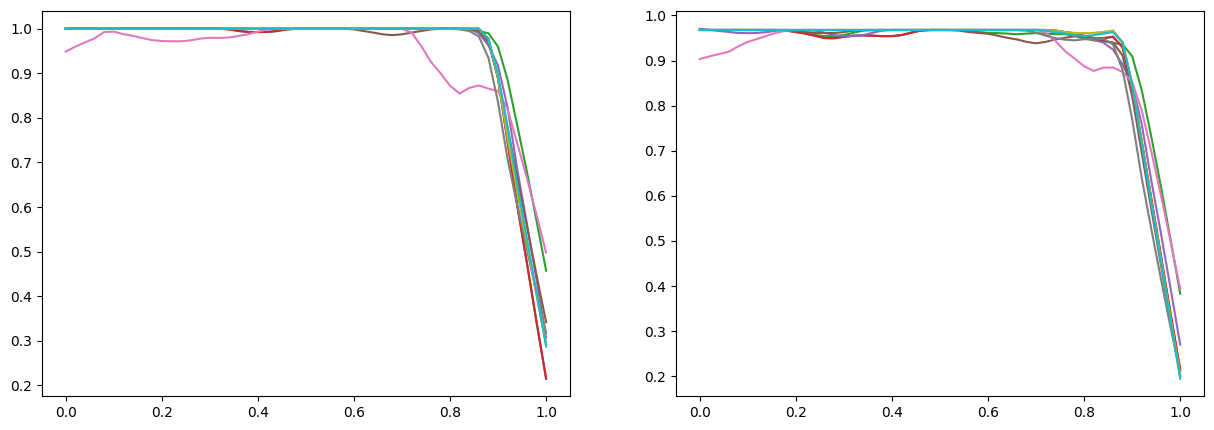

<Figure size 640x480 with 0 Axes>

In [12]:
ds = 6

dataset = datasets[ds]
result = torch.load(f'./evaluation/{dataset}')

result[3,:,:] = result[0,:,:]
result[8,:,:] = result[1,:,:]
result[6,0,:] = result[5,0,:]

smoother = LowessSmoother(smooth_fraction=0.15, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,0], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,2])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,0])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,2])

results_manuel[ds,:,:,0] = result_flt[i,:,0]
results_manuel[ds,:,:,2] = result_flt[i,:,2]
print(result[:,-1,2])

tensor([0.5389, 0.5389, 0.5389, 0.5389, 0.5389, 0.5389, 0.5389, 0.5389, 0.5389,
        0.5389])


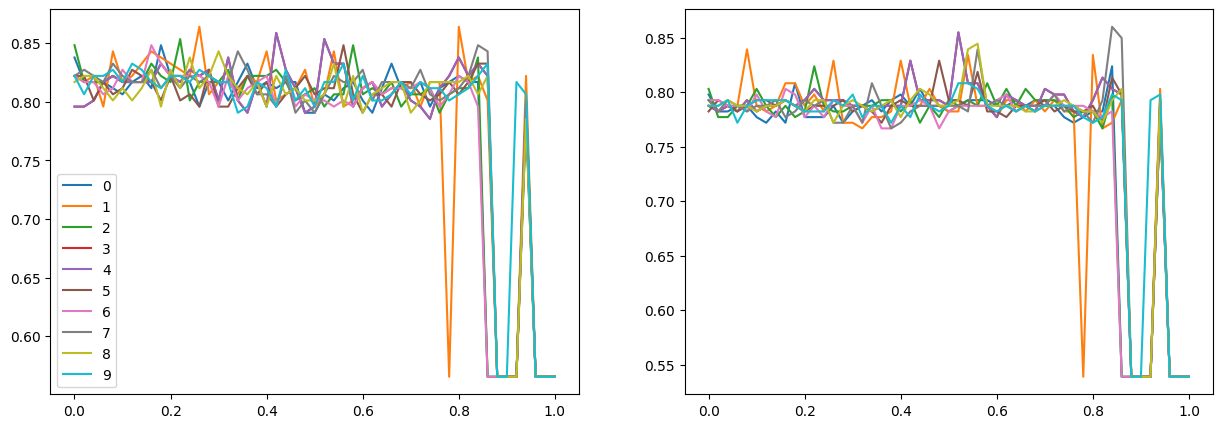

<Figure size 640x480 with 0 Axes>

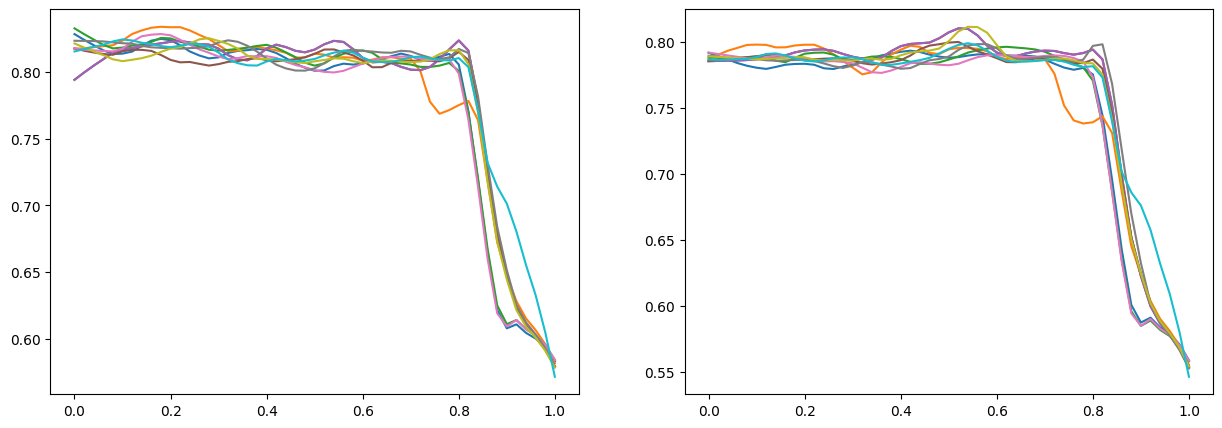

<Figure size 640x480 with 0 Axes>

In [13]:
ds = 7

dataset = datasets[ds]
result = torch.load(f'./evaluation/{dataset}')

result[4,:,:] = result[3,:,:]


smoother = LowessSmoother(smooth_fraction=0.15, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,0], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,2])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,0])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,2])

results_manuel[ds,:,:,0] = result_flt[i,:,0]
results_manuel[ds,:,:,2] = result_flt[i,:,2]
print(result[:,-1,2])

result_data:pendigits
tensor([0.0960, 0.0960, 0.0960, 0.0960, 0.0960, 0.0960, 0.0960, 0.0960, 0.0960,
        0.0960])


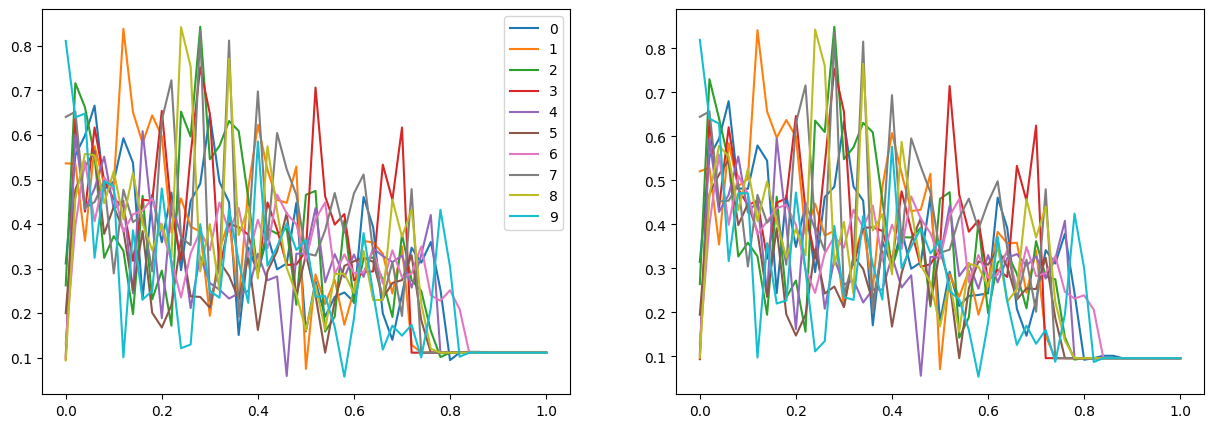

<Figure size 640x480 with 0 Axes>

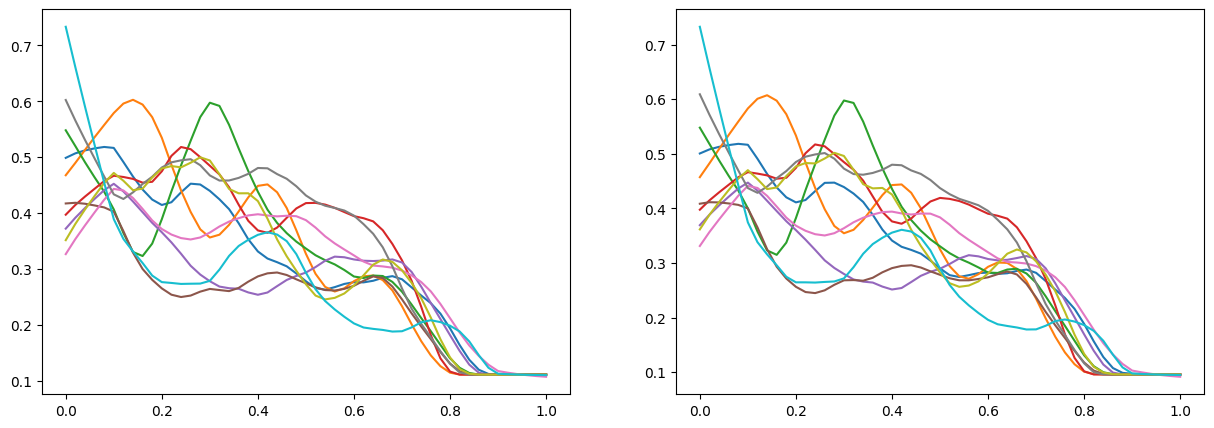

<Figure size 640x480 with 0 Axes>

In [14]:
ds = 8

dataset = datasets[ds]
print(dataset)
result = torch.load(f'./evaluation/{dataset}')

# result[4,:,:] = result[7,:,:]
# result[5,:,:] = result[8,:,:]
# result[6,:,:] = result[9,:,:]


smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,0], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,2])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,0])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,2])

results_manuel[ds,:,:,0] = result_flt[i,:,0]
results_manuel[ds,:,:,2] = result_flt[i,:,2]
print(result[:,-1,2])

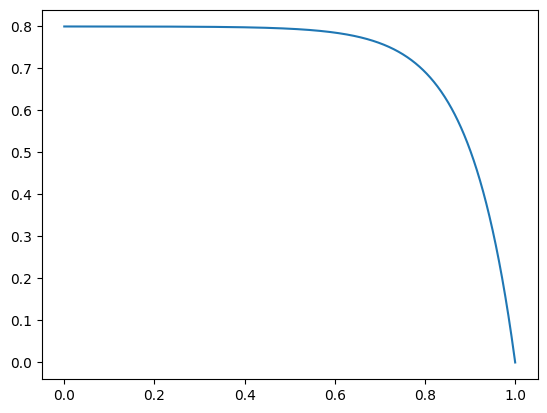

In [33]:
x = torch.linspace(0,1,1000)
y = (1 - (torch.exp(x*10) - 1) / (torch.exp(torch.tensor(10)) - 1))*0.8
plt.plot(x,y)

In [47]:
temp = result.max(0)[0]
temp.shape

torch.Size([51, 4])

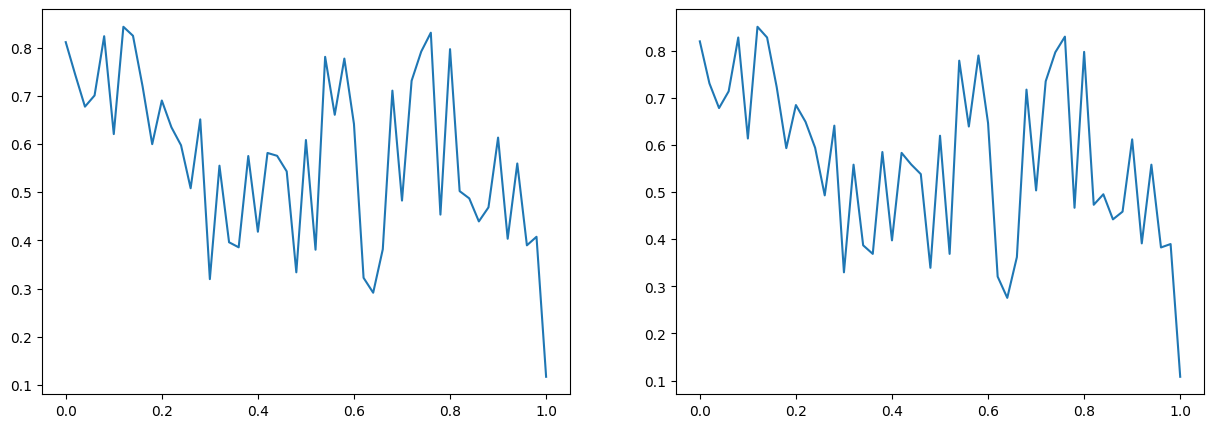

<Figure size 640x480 with 0 Axes>

In [49]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.plot(alpha, temp[:,0], label=f'{i}')
plt.figure()
ax2.plot(alpha, temp[:,2])

# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# ax1.plot(alpha, result_flt[:,0])
# plt.figure()

# ax2.plot(alpha, result_flt[:,2])

result_data:seeds
tensor([0.2558, 0.2558, 0.5349, 0.5349, 0.2558, 0.2558, 0.2558, 0.2558, 0.2558,
        0.2558])


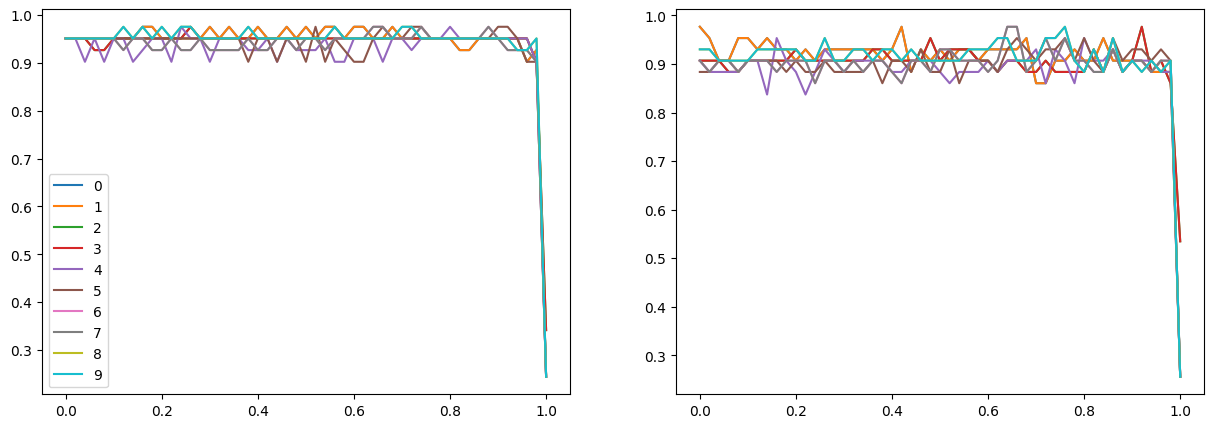

<Figure size 640x480 with 0 Axes>

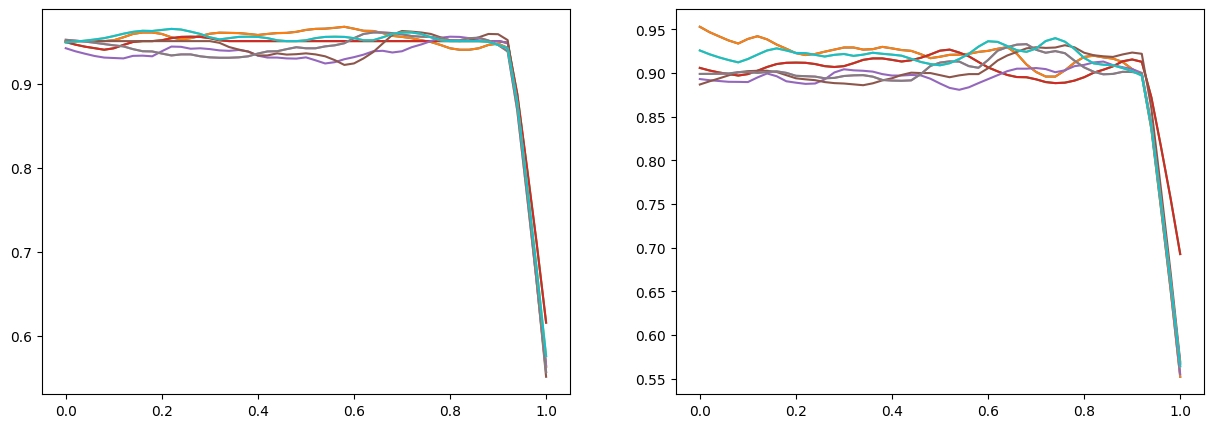

<Figure size 640x480 with 0 Axes>

In [26]:
ds = 9

dataset = datasets[ds]
print(dataset)
result = torch.load(f'./evaluation/{dataset}')

result[2,:,:] = result[3,:,:]
result[6,:,:] = result[7,:,:]
result[1,:,:] = result[0,:,:]
result[8,:,:] = result[9,:,:]


smoother = LowessSmoother(smooth_fraction=0.15, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,0], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,2])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,0])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,2])

results_manuel[ds,:,:,0] = result_flt[i,:,0]
results_manuel[ds,:,:,2] = result_flt[i,:,2]
print(result[:,-1,2])

result_data:tictactoe
tensor([0.3698, 0.3698, 0.3698, 0.3698, 0.3698, 0.3698, 0.3698, 0.3698, 0.6302,
        0.3698])


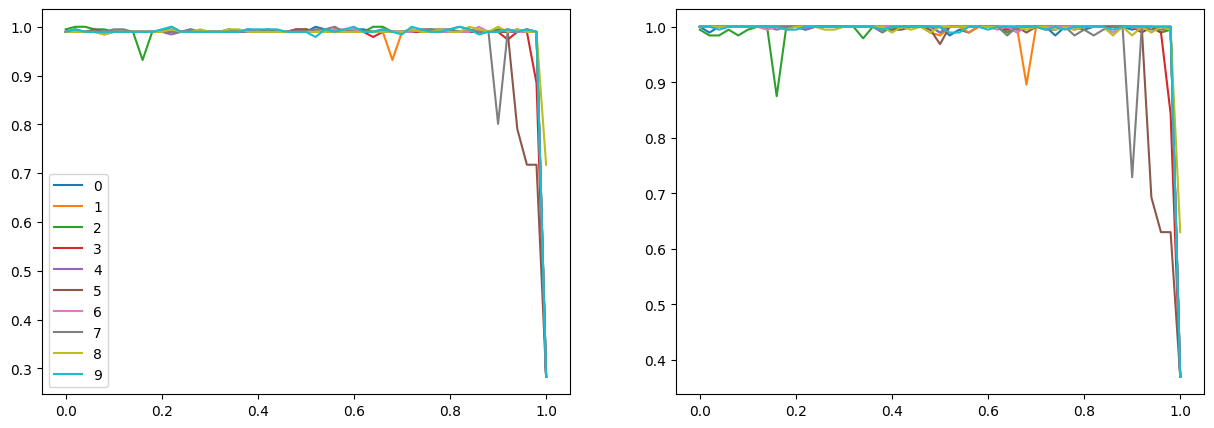

<Figure size 640x480 with 0 Axes>

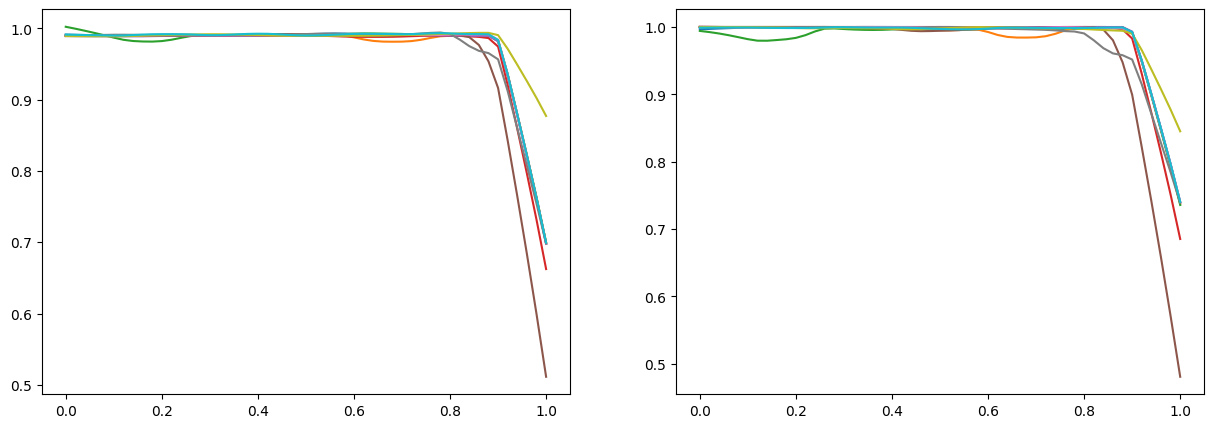

<Figure size 640x480 with 0 Axes>

In [27]:
ds = 10

dataset = datasets[ds]
print(dataset)
result = torch.load(f'./evaluation/{dataset}')

result[8,0,:] = result[3,0,:]


smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,0], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,2])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,0])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,2])

results_manuel[ds,:,:,0] = result_flt[i,:,0]
results_manuel[ds,:,:,2] = result_flt[i,:,2]
print(result[:,-1,2])

result_data:vertebralcolumn2clases
tensor([0.6349, 0.6349, 0.6349, 0.6349, 0.6349, 0.6349, 0.6349, 0.6349, 0.6349,
        0.6349])


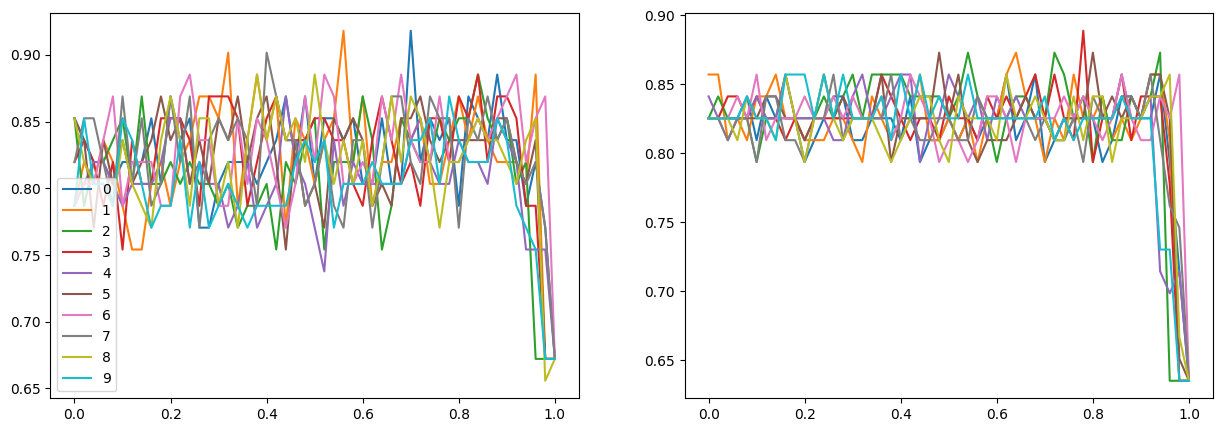

<Figure size 640x480 with 0 Axes>

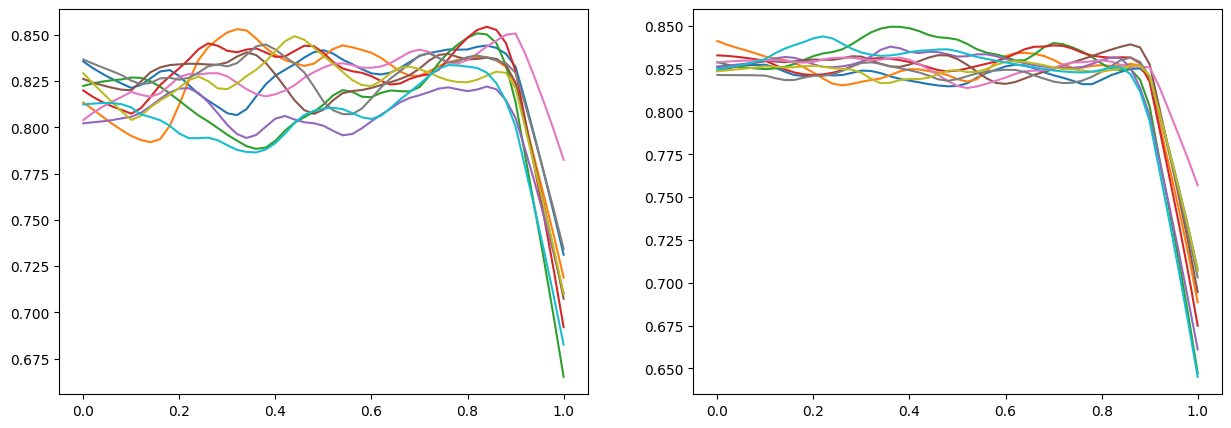

<Figure size 640x480 with 0 Axes>

In [28]:
ds = 11

dataset = datasets[ds]
print(dataset)
result = torch.load(f'./evaluation/{dataset}')

# result[8,0,:] = result[3,0,:]


smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,0], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,2])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,0])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,2])

results_manuel[ds,:,:,0] = result_flt[i,:,0]
results_manuel[ds,:,:,2] = result_flt[i,:,2]
print(result[:,-1,2])

result_data:vertebralcolumn3clases
tensor([0.1587, 0.1587, 0.1587, 0.1587, 0.1587, 0.1587, 0.1587, 0.1587, 0.1587,
        0.1587])


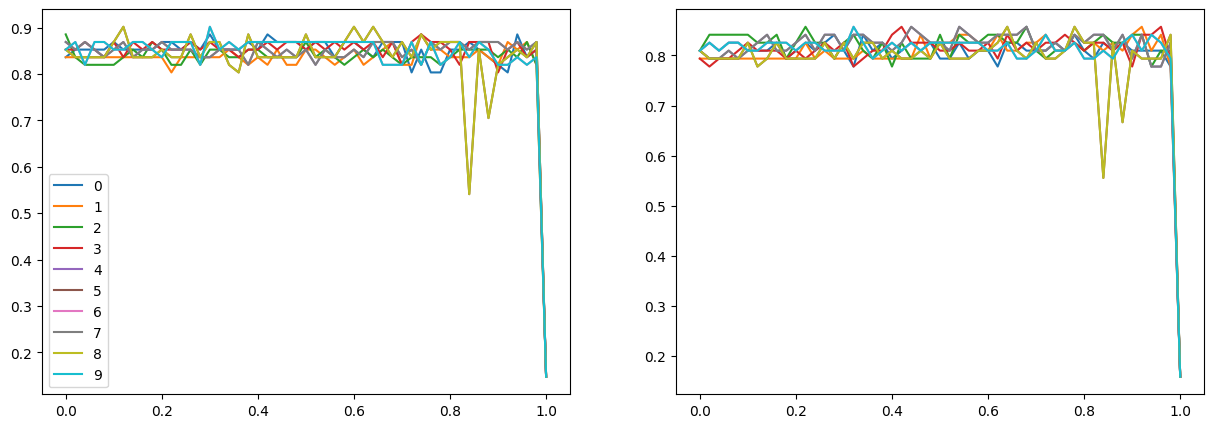

<Figure size 640x480 with 0 Axes>

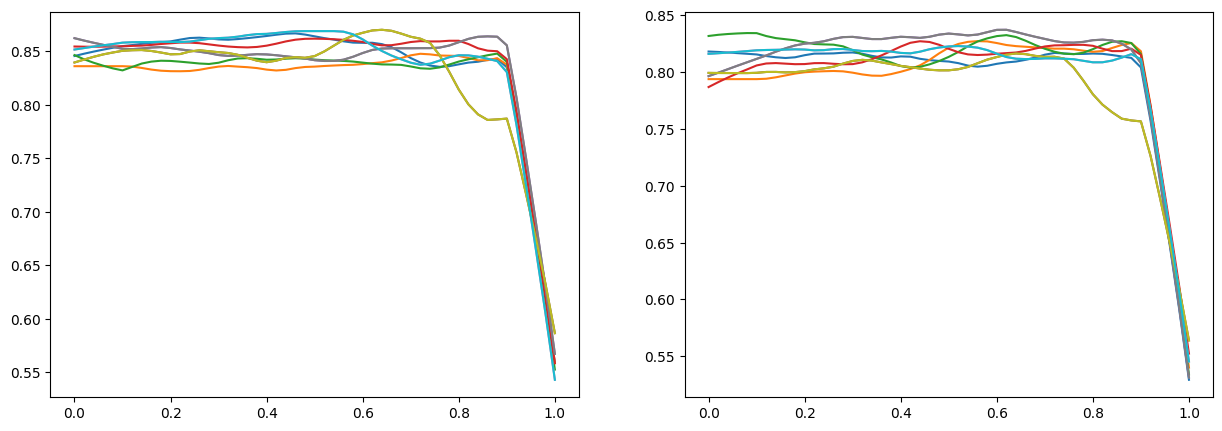

<Figure size 640x480 with 0 Axes>

In [29]:
ds = 12

dataset = datasets[ds]
print(dataset)
result = torch.load(f'./evaluation/{dataset}')

result[4,:,:] = result[7,:,:]
result[5,:,:] = result[8,:,:]
result[6,:,:] = result[9,:,:]


smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,0], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,2])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,0])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,2])

results_manuel[ds,:,:,0] = result_flt[i,:,0]
results_manuel[ds,:,:,2] = result_flt[i,:,2]
print(result[:,-1,2])

# Power

result_data:acuteinflammation
tensor([0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002])


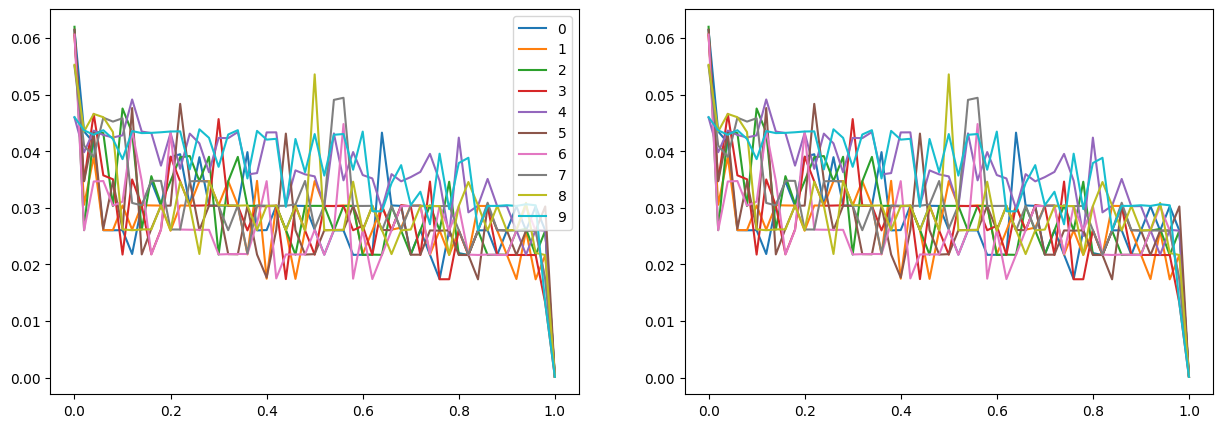

<Figure size 640x480 with 0 Axes>

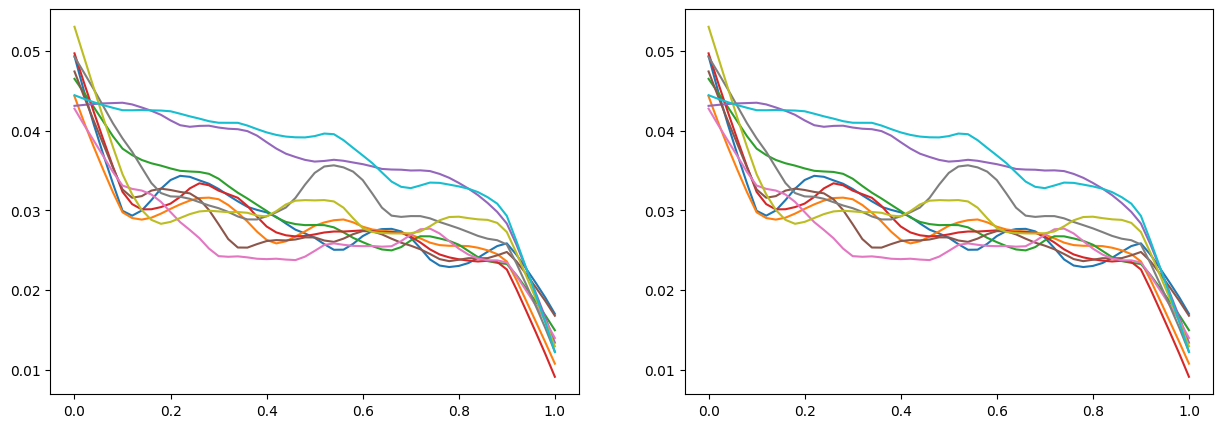

<Figure size 640x480 with 0 Axes>

In [30]:
ds = 0

dataset = datasets[ds]
print(dataset)
result = torch.load(f'./evaluation/{dataset}')

# result[4,:,:] = result[7,:,:]
# result[5,:,:] = result[8,:,:]
# result[6,:,:] = result[9,:,:]


smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,1], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,3])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,1])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,3])

results_manuel[ds,:,:,1] = result_flt[i,:,1]
results_manuel[ds,:,:,3] = result_flt[i,:,3]
print(result[:,-1,3])

result_data:balancescale
tensor([0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002])


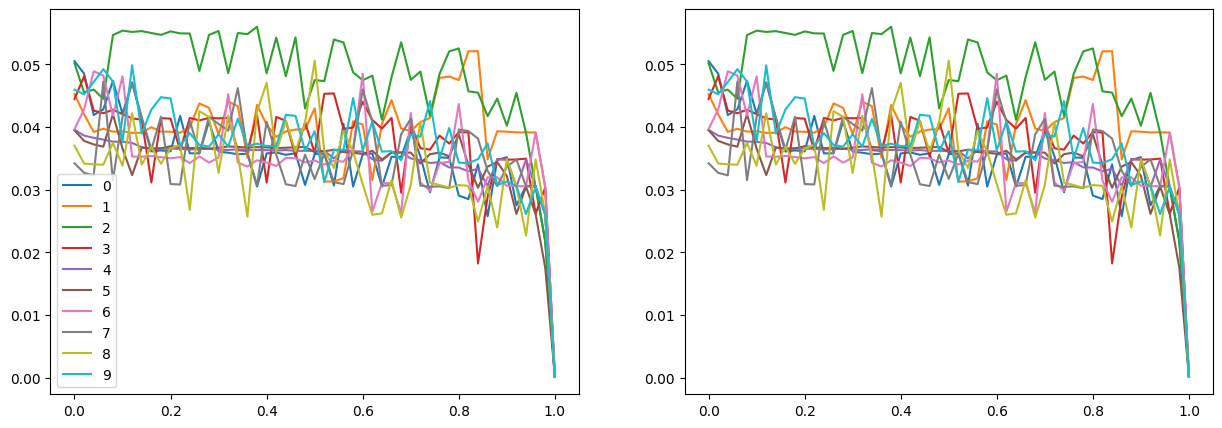

<Figure size 640x480 with 0 Axes>

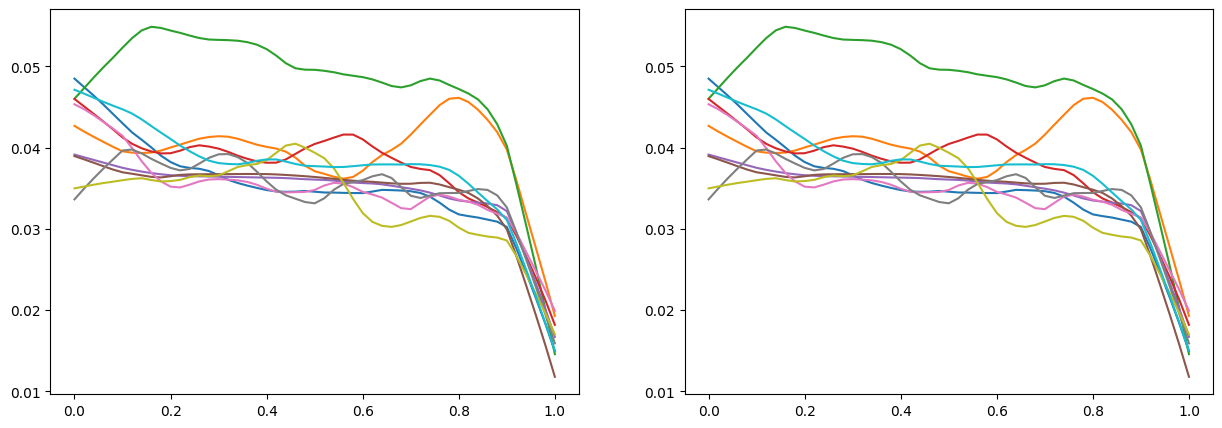

<Figure size 640x480 with 0 Axes>

In [31]:
ds = 1

dataset = datasets[ds]
print(dataset)
result = torch.load(f'./evaluation/{dataset}')

# result[4,:,:] = result[7,:,:]
# result[5,:,:] = result[8,:,:]
# result[6,:,:] = result[9,:,:]


smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,1], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,3])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,1])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,3])

results_manuel[ds,:,:,1] = result_flt[i,:,1]
results_manuel[ds,:,:,3] = result_flt[i,:,3]
print(result[:,-1,3])

result_data:breastcancerwisc
tensor([0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002])


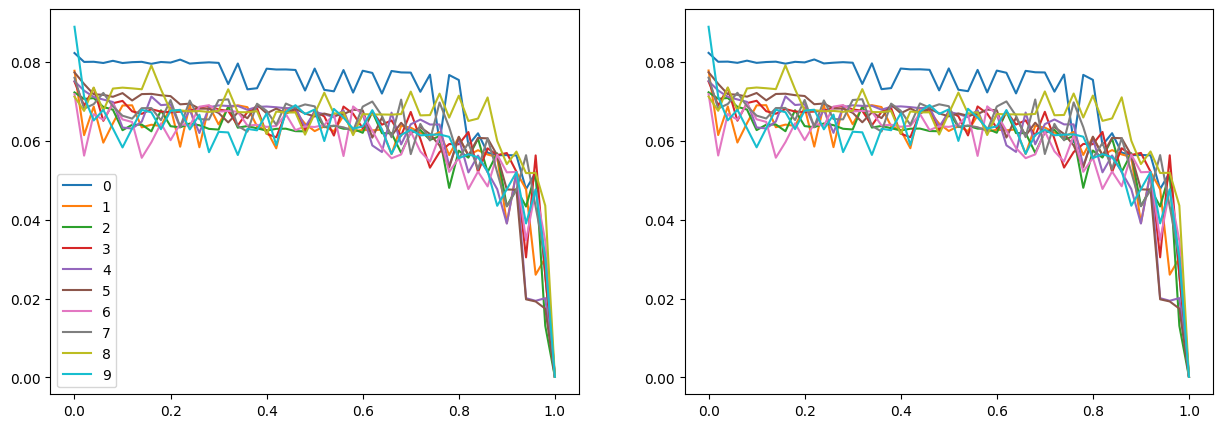

<Figure size 640x480 with 0 Axes>

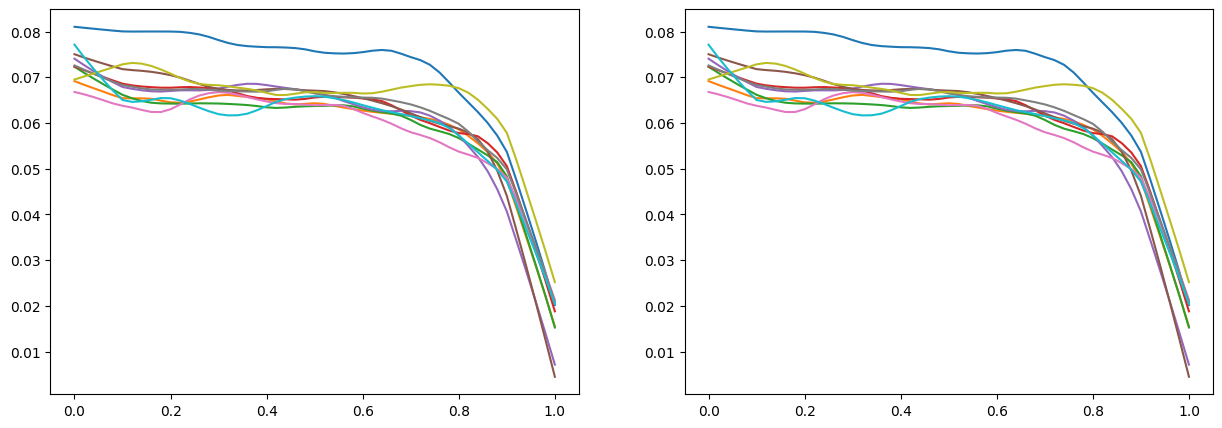

<Figure size 640x480 with 0 Axes>

In [32]:
ds = 2

dataset = datasets[ds]
print(dataset)
result = torch.load(f'./evaluation/{dataset}')

# result[4,:,:] = result[7,:,:]
# result[5,:,:] = result[8,:,:]
# result[6,:,:] = result[9,:,:]


smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,1], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,3])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,1])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,3])

results_manuel[ds,:,:,1] = result_flt[i,:,1]
results_manuel[ds,:,:,3] = result_flt[i,:,3]
print(result[:,-1,3])

result_data:cardiotocography3clases
tensor([0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002])


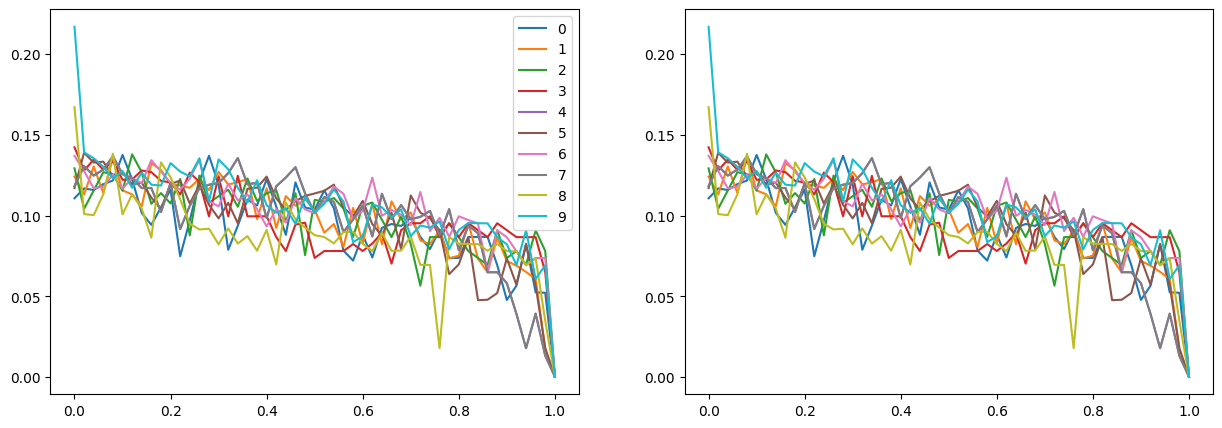

<Figure size 640x480 with 0 Axes>

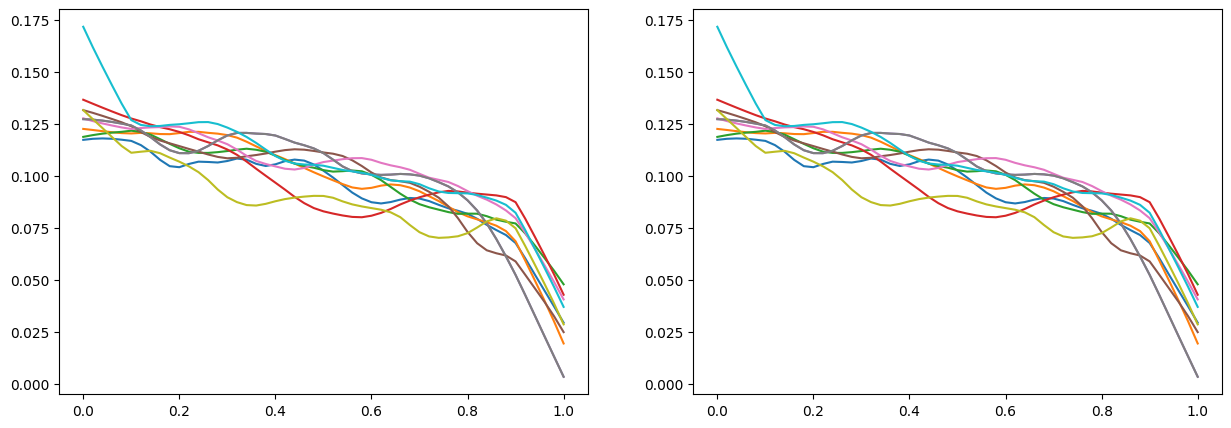

<Figure size 640x480 with 0 Axes>

In [33]:
ds = 3

dataset = datasets[ds]
print(dataset)
result = torch.load(f'./evaluation/{dataset}')

result[4,:,:] = result[7,:,:]


smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,1], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,3])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,1])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,3])

results_manuel[ds,:,:,1] = result_flt[i,:,1]
results_manuel[ds,:,:,3] = result_flt[i,:,3]
print(result[:,-1,3])

result_data:energyy1
tensor([0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002])


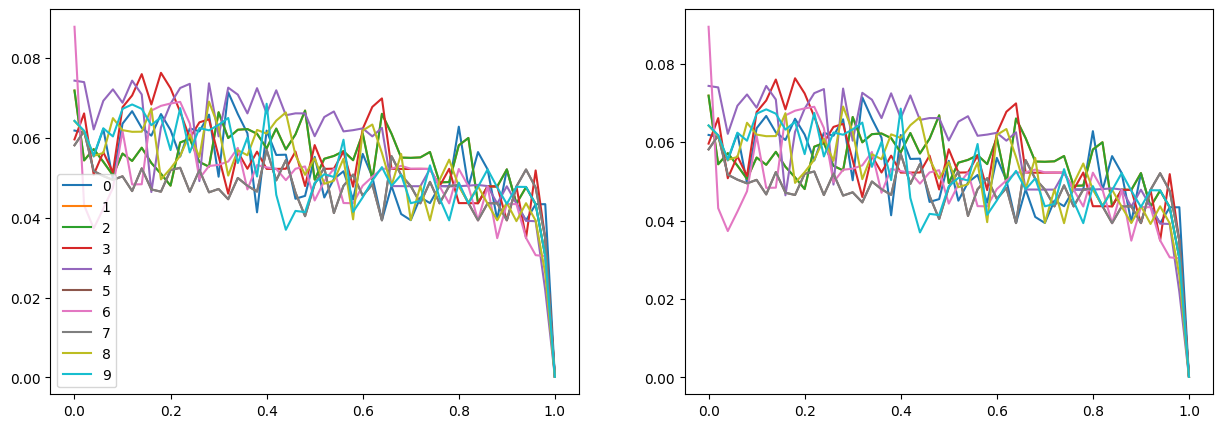

<Figure size 640x480 with 0 Axes>

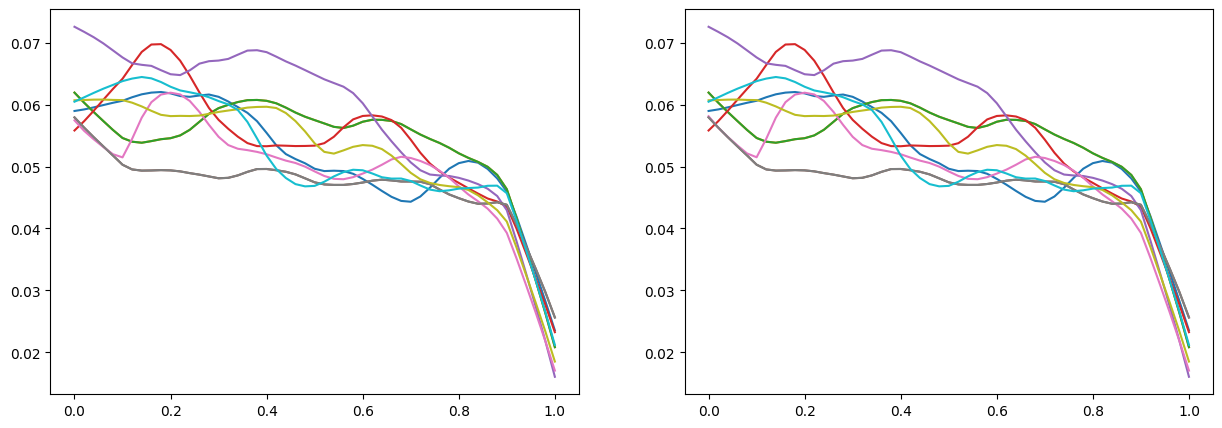

<Figure size 640x480 with 0 Axes>

In [34]:
ds = 4

dataset = datasets[ds]
print(dataset)
result = torch.load(f'./evaluation/{dataset}')

result[1,:,:] = result[2,:,:]
result[5,:,:] = result[7,:,:]


smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,1], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,3])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,1])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,3])

results_manuel[ds,:,:,1] = result_flt[i,:,1]
results_manuel[ds,:,:,3] = result_flt[i,:,3]
print(result[:,-1,3])

result_data:energyy2
tensor([0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002])


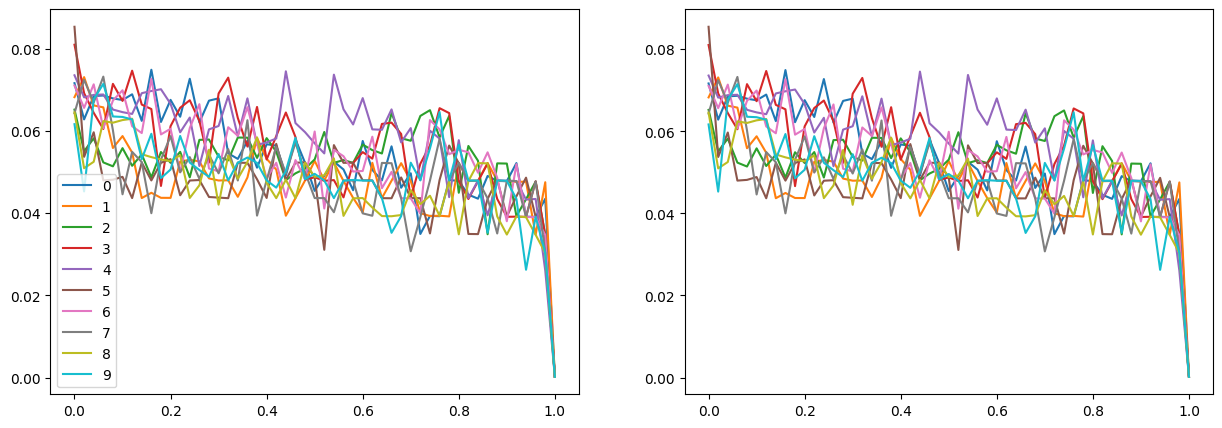

<Figure size 640x480 with 0 Axes>

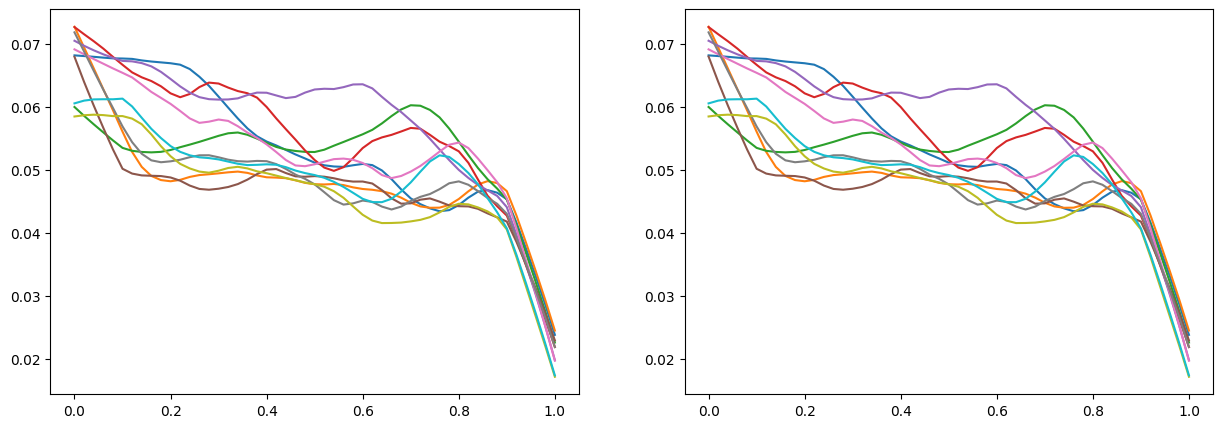

<Figure size 640x480 with 0 Axes>

In [35]:
ds = 5

dataset = datasets[ds]
print(dataset)
result = torch.load(f'./evaluation/{dataset}')

# result[1,:,:] = result[2,:,:]
# result[5,:,:] = result[7,:,:]


smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,1], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,3])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,1])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,3])

results_manuel[ds,:,:,1] = result_flt[i,:,1]
results_manuel[ds,:,:,3] = result_flt[i,:,3]
print(result[:,-1,3])

result_data:iris
tensor([0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002])


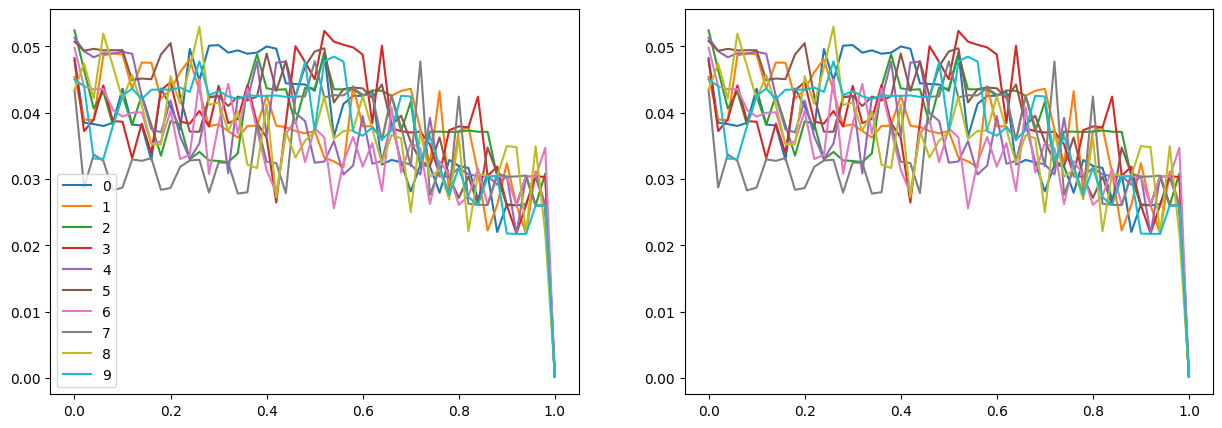

<Figure size 640x480 with 0 Axes>

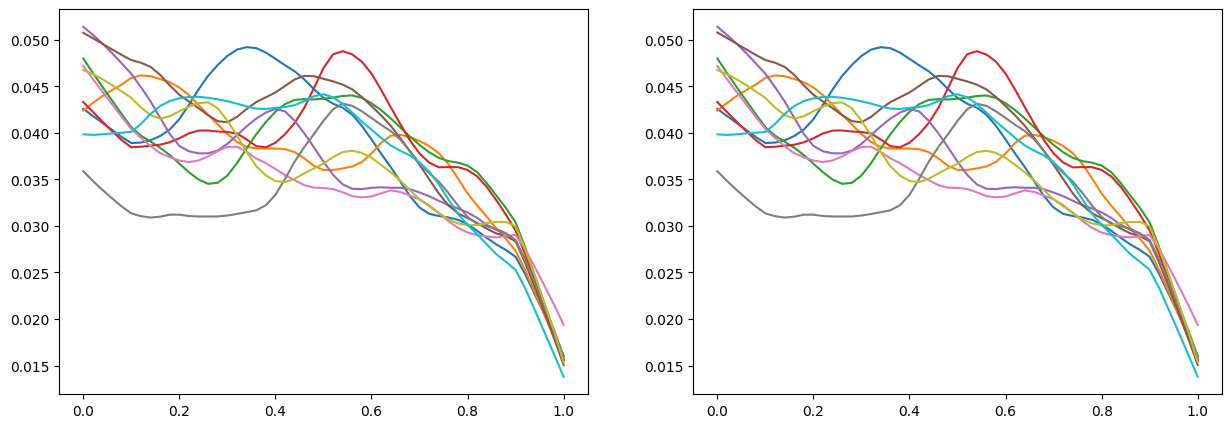

<Figure size 640x480 with 0 Axes>

In [36]:
ds = 6

dataset = datasets[ds]
print(dataset)
result = torch.load(f'./evaluation/{dataset}')

# result[1,:,:] = result[2,:,:]
# result[5,:,:] = result[7,:,:]


smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,1], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,3])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,1])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,3])

results_manuel[ds,:,:,1] = result_flt[i,:,1]
results_manuel[ds,:,:,3] = result_flt[i,:,3]
print(result[:,-1,3])

result_data:mammographic
tensor([0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002])


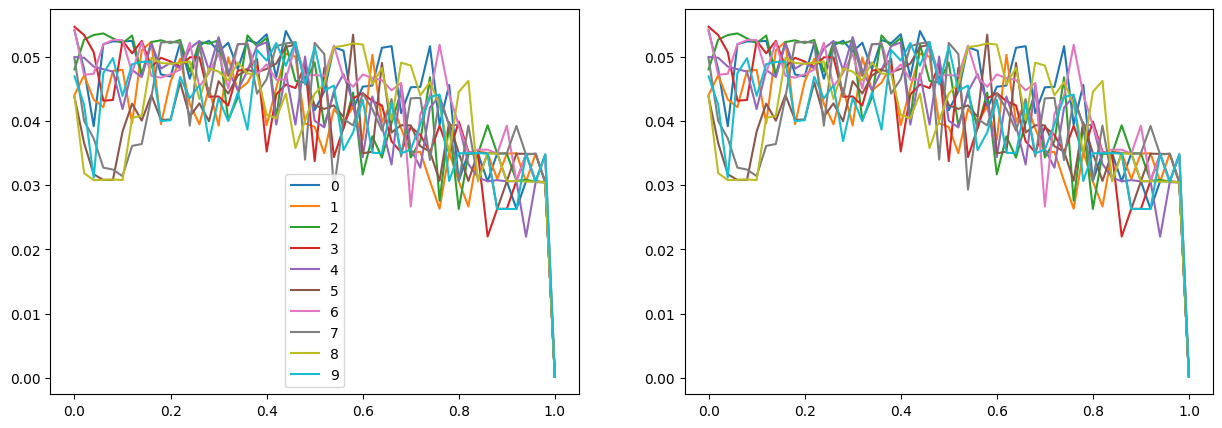

<Figure size 640x480 with 0 Axes>

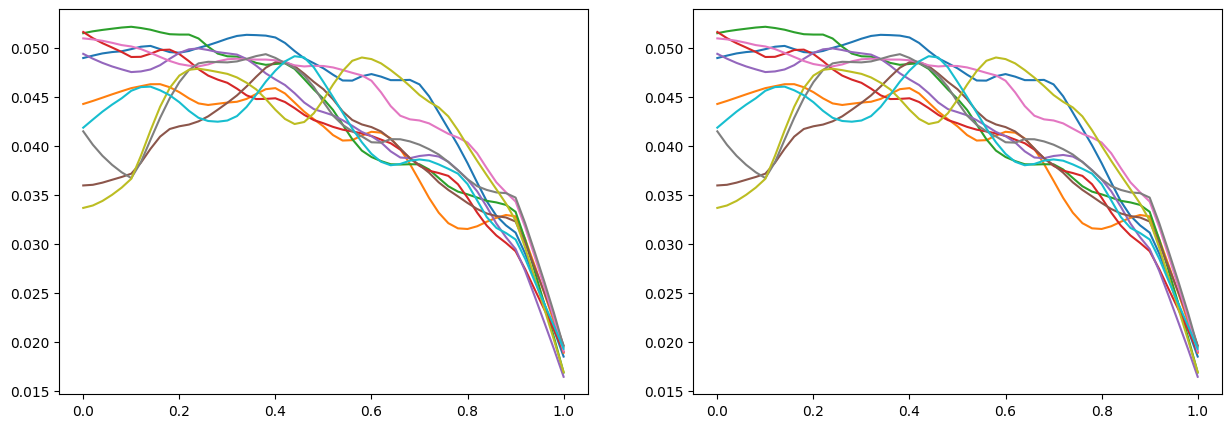

<Figure size 640x480 with 0 Axes>

In [37]:
ds = 7

dataset = datasets[ds]
print(dataset)
result = torch.load(f'./evaluation/{dataset}')

# result[1,:,:] = result[2,:,:]
# result[5,:,:] = result[7,:,:]


smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,1], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,3])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,1])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,3])

results_manuel[ds,:,:,1] = result_flt[i,:,1]
results_manuel[ds,:,:,3] = result_flt[i,:,3]
print(result[:,-1,3])

result_data:pendigits
tensor([0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004,
        0.0004])


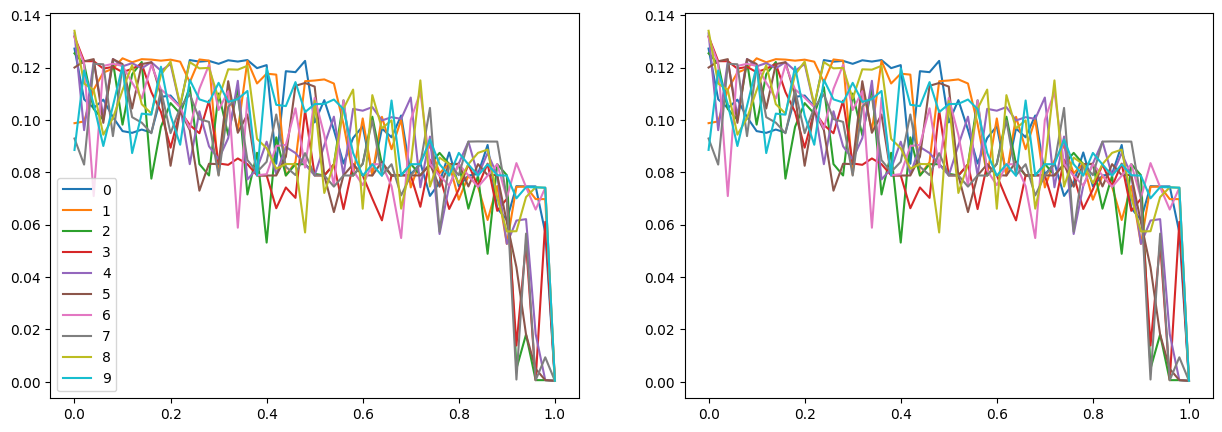

<Figure size 640x480 with 0 Axes>

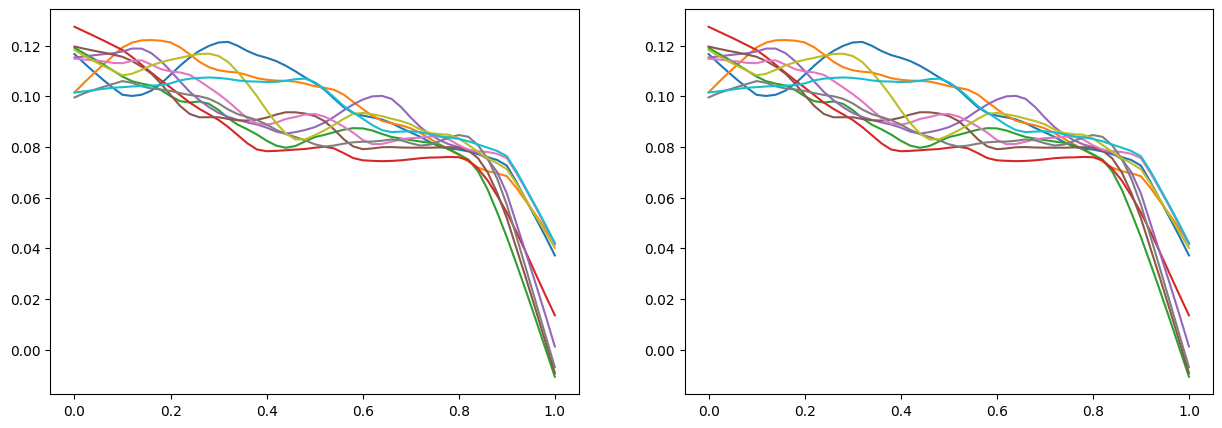

<Figure size 640x480 with 0 Axes>

In [38]:
ds = 8

dataset = datasets[ds]
print(dataset)
result = torch.load(f'./evaluation/{dataset}')

# result[1,:,:] = result[2,:,:]
# result[5,:,:] = result[7,:,:]


smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,1], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,3])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,1])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,3])

results_manuel[ds,:,:,1] = result_flt[i,:,1]
results_manuel[ds,:,:,3] = result_flt[i,:,3]
print(result[:,-1,3])

result_data:seeds
tensor([0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002])


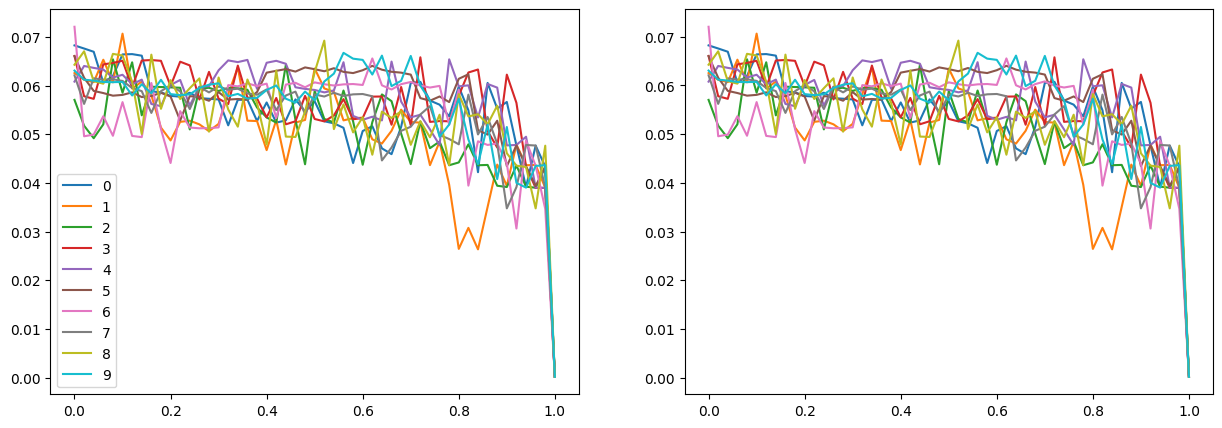

<Figure size 640x480 with 0 Axes>

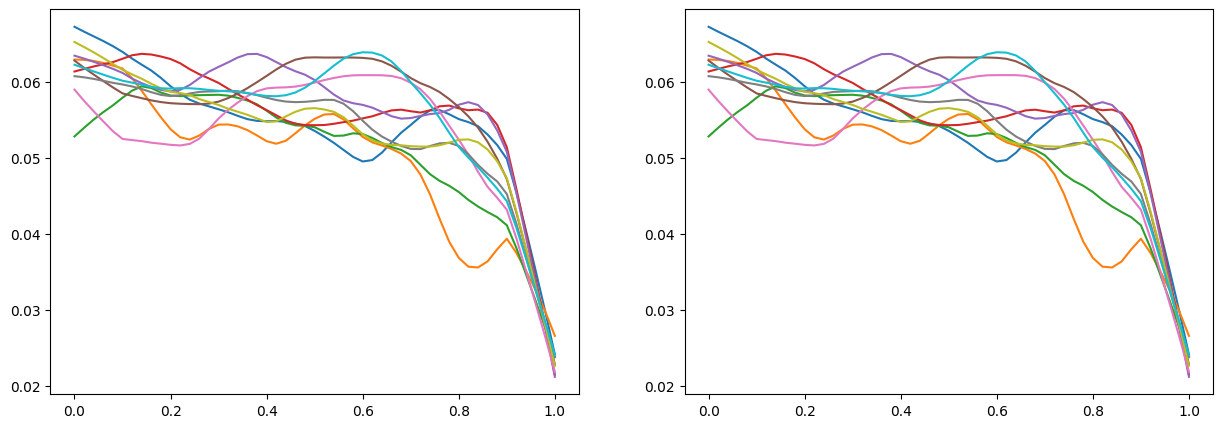

<Figure size 640x480 with 0 Axes>

In [39]:
ds = 9

dataset = datasets[ds]
print(dataset)
result = torch.load(f'./evaluation/{dataset}')

# result[1,:,:] = result[2,:,:]
# result[5,:,:] = result[7,:,:]


smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,1], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,3])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,1])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,3])

results_manuel[ds,:,:,1] = result_flt[i,:,1]
results_manuel[ds,:,:,3] = result_flt[i,:,3]
print(result[:,-1,3])

result_data:tictactoe
tensor([0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002])


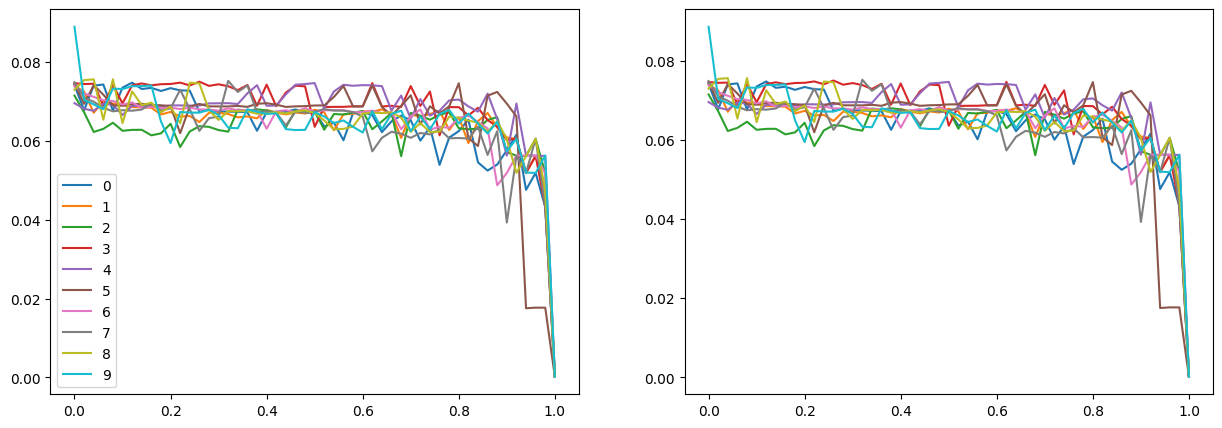

<Figure size 640x480 with 0 Axes>

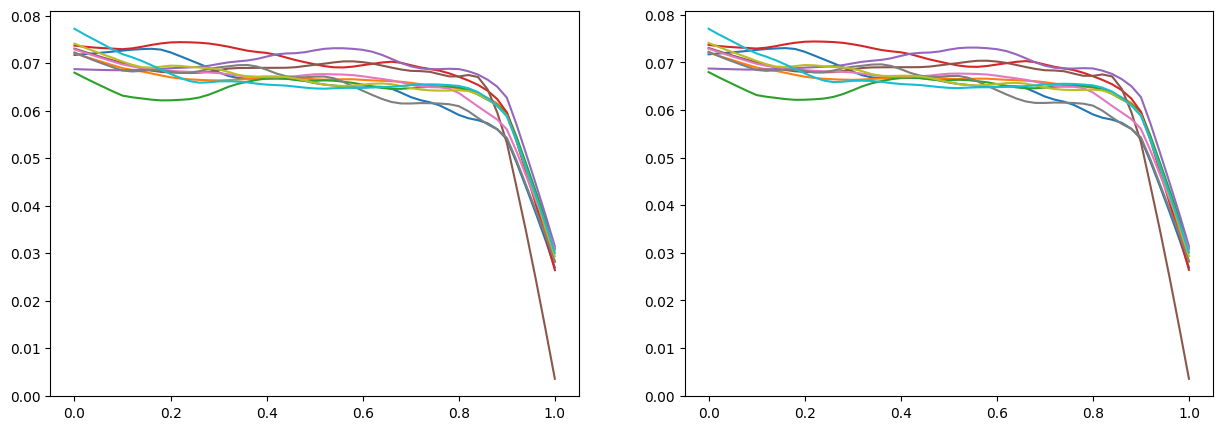

<Figure size 640x480 with 0 Axes>

In [40]:
ds = 10

dataset = datasets[ds]
print(dataset)
result = torch.load(f'./evaluation/{dataset}')

# result[1,:,:] = result[2,:,:]
# result[5,:,:] = result[7,:,:]


smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,1], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,3])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,1])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,3])

results_manuel[ds,:,:,1] = result_flt[i,:,1]
results_manuel[ds,:,:,3] = result_flt[i,:,3]
print(result[:,-1,3])

result_data:vertebralcolumn2clases
tensor([0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002])


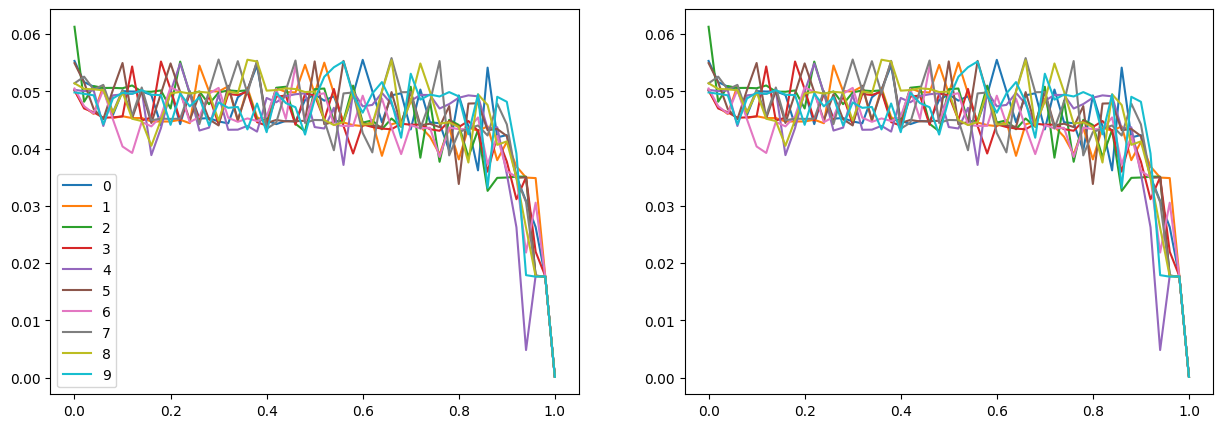

<Figure size 640x480 with 0 Axes>

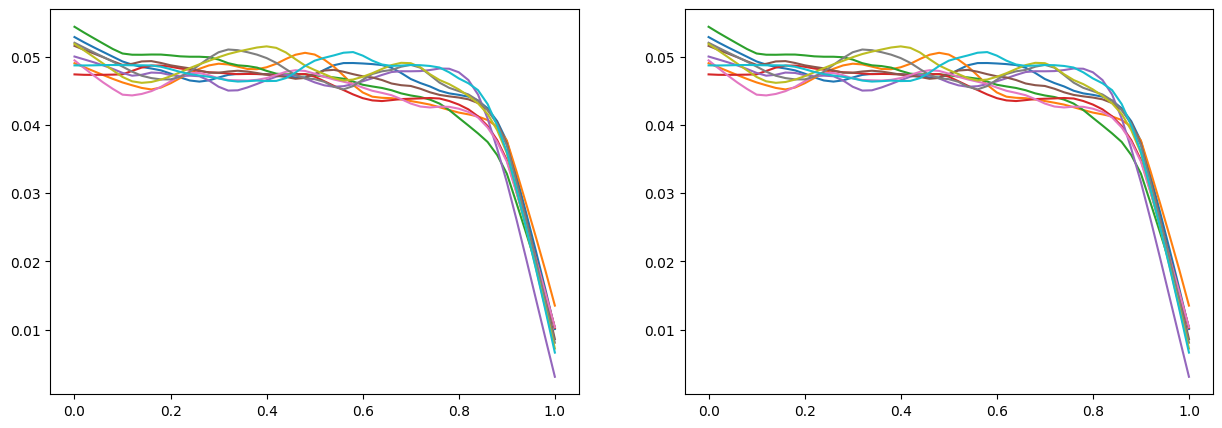

<Figure size 640x480 with 0 Axes>

In [41]:
ds = 11

dataset = datasets[ds]
print(dataset)
result = torch.load(f'./evaluation/{dataset}')

# result[1,:,:] = result[2,:,:]
# result[5,:,:] = result[7,:,:]


smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,1], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,3])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,1])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,3])

results_manuel[ds,:,:,1] = result_flt[i,:,1]
results_manuel[ds,:,:,3] = result_flt[i,:,3]
print(result[:,-1,3])

result_data:vertebralcolumn3clases
tensor([0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002,
        0.0002])


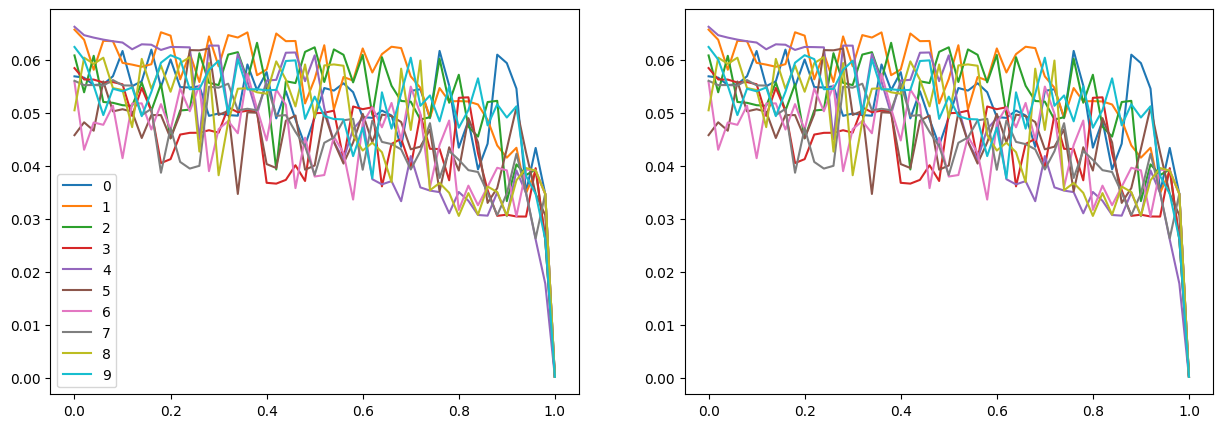

<Figure size 640x480 with 0 Axes>

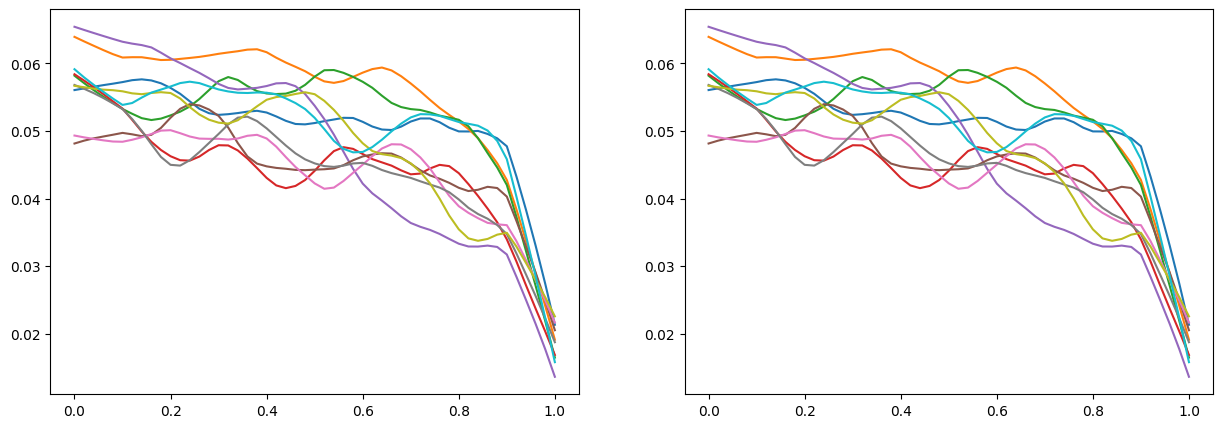

<Figure size 640x480 with 0 Axes>

In [42]:
ds = 12

dataset = datasets[ds]
print(dataset)
result = torch.load(f'./evaluation/{dataset}')

# result[1,:,:] = result[2,:,:]
# result[5,:,:] = result[7,:,:]


smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
result_flt = flt(result,smoother)
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result[i,:,1], label=f'{i}')
ax1.legend()
plt.figure()
for i in range(10):
    ax2.plot(alpha, result[i,:,3])
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i in range(10):
    ax1.plot(alpha, result_flt[i,:,1])
plt.figure()
for i in range(10):
    ax2.plot(alpha, result_flt[i,:,3])

results_manuel[ds,:,:,1] = result_flt[i,:,1]
results_manuel[ds,:,:,3] = result_flt[i,:,3]
print(result[:,-1,3])